In [1]:
import pandas as pd

df = pd.read_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated1.csv')

In [2]:
pd.set_option('display.max_columns', 120)

In [3]:
df.head()

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepTimeBlk,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by DepDelay,Merged by CRSArrTime,Merged by ArrDelay,Merged by Distance
0,1582,1631,1627.0,1600-1659,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,-4.0 / 0.0 / 0.0 / -1.0,1821 / 1800-1859,-1.0 / 0.0 / 0.0 / -1.0,581.0 / 3
1,1583,1024,1019.0,1000-1059,17.0,3.0,1212.0,0.0,0.0,123.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N345NB,DL / 19790 / DL,11697 / 1169706 / 32467 / FLL / Fort Lauderdal...,1449202 / 14492 / 34492 / RDU / Raleigh/Durham...,-5.0 / 0.0 / 0.0 / -1.0,1227 / 1200-1259,-15.0 / 0.0 / 0.0 / -1.0,680.0 / 3
2,1584,1117,1113.0,1100-1159,14.0,4.0,1131.0,0.0,0.0,85.0,78.0,60.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...,-4.0 / 0.0 / 0.0 / -1.0,1142 / 1100-1159,-11.0 / 0.0 / 0.0 / -1.0,341.0 / 2
3,1584,1237,1230.0,1200-1259,11.0,5.0,1435.0,0.0,0.0,81.0,65.0,49.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...,"1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-7.0 / 0.0 / 0.0 / -1.0,1458 / 1400-1459,-23.0 / 0.0 / 0.0 / -2.0,341.0 / 2
4,1585,900,857.0,0900-0959,13.0,8.0,1038.0,0.0,0.0,110.0,101.0,80.0,1.0,0,DL / DL / 19790 / DL / N878DN,DL / 19790 / DL,"14524 / 1452401 / 34524 / RIC / Richmond, VA /...","1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",-3.0 / 0.0 / 0.0 / -1.0,1050 / 1000-1059,-12.0 / 0.0 / 0.0 / -1.0,481.0 / 2


In [4]:
df.Flight_Number_Marketing_Airline.value_counts()

Flight_Number_Marketing_Airline
2438    183
1537    168
493     165
464     162
2368    155
       ... 
8772      1
6161      1
3334      1
8812      1
4463      1
Name: count, Length: 6235, dtype: int64

Önişleme aşamasında özniteliklerin aralarındaki ilişkiyi analiz edilip veri seti üzerinde bir takım işlemler gerçekleştirilmiştir.Veriseti, şuanda daha öz, anlamlı ve daha temiz bir durumdadır. Yine de kullanacağımız makine öğrenmesi modeli için hazır hale geldiğini söyleyemeyiz. Bu aşamada, belki de en başta yapmamız gereken, fakat çok fazla öznitelik arasında boğulacağımız için ertelediğimiz Keşifçi Veri Analizi gerçekleştirilecektir.

### Özniteliklerin Anlamları

✅ **Flight_Number_Marketing_Airline**: Uçuş numarası

❌ **CRSDepTime**: Kalkış Saati (yerel saat: ssdd)

❌ **DepTime**: Gerçek Kalkış Saati (yerel saat: ssdd)

✅ **DepTimeBlk**: CRS Kalkış Zaman Bloğu, Saatlik Aralıklar.

❌ **TaxiOut**: Uçağın kalkışa hazırlanırken park yerinden kalkış pistine yönlendiği süreyi (dakika) ifade eder.

❌**TaxiIn**: Uçağın inmiş olduğu pistten park yerine doğru taksi yaptığı süreyi (dakika) ifade eder.

❌ **ArrTime**: Gerçek Varış Saati (yerel saat: hhmm)

❌ **Cancelled**: İptal Edilen Uçuş Göstergesi (1=Evet)

❌ **Diverted**: Bir uçağın planlanan varış noktasından başka bir havaalanına yönlendirilmesini ifade eder. (1=Evet)

_ElapsedTime'ın anlamı: Bu terim, bir uçağın bir noktadan hareket ettiği andan, hedef noktasına ulaştığı ana kadar geçen toplam süreyi ifade eder. Bu süre, uçağın kalkışa hazırlanma, taksi yapma, beklemeler, iniş ve varış sonrası süreçleri içerir. Yani, uçağın kalkış noktasından hedef noktasına kadar olan tüm süreyi kapsar, bu süre içinde uçak havada olmak zorunda değildir._

❌ **CRSElapsedTime**: Planlanan elapsed time (dakika)

❌ **ActualElapsedTime**: Gerçekleşen elapsed time (dakika)

✅ **AirTime**: Bu terim, bir uçağın gerçekten havada geçirdiği süreyi ifade eder. (dakika cinsinden ifade edilmiştir.)

❌ ~~**Flights**: (Tüm değerler aynı, silinecek)~~

❌ ~~**DivAirportLandings**: (Tüm değerler aynı, silinecek)~~

❌ **Merged by Marketing_Airline_Network** ve **Merged by Operating_Airline**: (Bu tür bir kodlama, farklı havayolu taşıyıcılarının benzersiz tanımlayıcılarını sıralamak ve önceki kullanıcıları belirtmek için kullanılıyor gibi görünüyor. Bu, zaman içinde bu taşıyıcıların kullanımını izlemek ve analiz etmek isteyenler için faydalı olabilir. Bu proje için faydalı olacağa benzemiyor, silinecek) 

✅ **Merged by OriginAirportID**: Kalkışın yapıldığı havalimanı ve havalimanına ait geri kalan bilgilerin birleştirildiği kolon.

❌ **Merged by DestAirportSeqID:** İnişin yapıldığı havalimanı ve havalimanına ait geri kalan bilgilerin birleştirildiği kolon. 

❌ **Merged by DepDelay**: Kalkış süresindeki gecikme ve değişmelerini gösteren özniteliklerin birleştiği kolon.

❌ **Merged by CRSArrTime**: CRS Varış Saati (yerel saat: hhmm)

❌ **Merged by ArrDelay**: İniş süresindeki gecikme ve değişmelerini gösteren özniteliklerin birleştiği kolon.

❌**Merged by Distance**: Havalimanları arasındaki mesafe (miles)

----



**DepDelay**/**ArrDelay**: Planlanan ve fiili kalkış/iniş saati arasındaki dakika farkı. Erken ayrılmalar negatif rakamlar gösteriyor.

**DepDelayMinutes**/**ArrDelayMinutes**: Planlanan ve fiili kalkış/iniş saati arasındaki dakika farkı. Erken kalkışlar/inişler 0 olarak ayarlandı.

**DepDel15**/**ArrDel15**: Kalkış/iniş gecikme Göstergesi, 15 dakika veya daha fazla (1=Evet)

**DepartureDelayGroups**/**ArrivalDelayGroups**: Kalkış/iniş Gecikmesi aralıkları, her (<-15'ten >180'e 15 dakika)

In [5]:
target_cols_departure = ['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups']
target_cols_arrival = ['ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups']


def merge_edilmis_kolonlari_ayir(target_col):
    df[target_col] = df['Merged by DepDelay'].str.split(' / ', expand=True)
    df[target_col] = df[target_col].astype(float)

merge_edilmis_kolonlari_ayir(target_col=target_cols_departure)
merge_edilmis_kolonlari_ayir(target_col=target_cols_arrival)

In [6]:
df.head(1)

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepTimeBlk,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by DepDelay,Merged by CRSArrTime,Merged by ArrDelay,Merged by Distance,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
0,1582,1631,1627.0,1600-1659,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,-4.0 / 0.0 / 0.0 / -1.0,1821 / 1800-1859,-1.0 / 0.0 / 0.0 / -1.0,581.0 / 3,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0


In [7]:
df.drop(['Merged by DepDelay', 'Merged by ArrDelay'], axis=1, inplace=True)

In [8]:
df.head(1)

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepTimeBlk,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by CRSArrTime,Merged by Distance,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
0,1582,1631,1627.0,1600-1659,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,1821 / 1800-1859,581.0 / 3,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0


In [9]:
df.loc[:3, ['CRSDepTime', 'DepTime', 'DepDelay']]

,CRSDepTime,DepTime,DepDelay
0,1631,1627.0,-4.0
1,1024,1019.0,-5.0
2,1117,1113.0,-4.0
3,1237,1230.0,-7.0


Gözlemlenebileceği üzere DepTime (Gerçek kalkış zamanı) - CRSDepTime (Planlanan kalkış zamanı) = DepDelay (Kalkıştaki gecikme)

Uçağın saat kaçta kalktığı ile erteleme olup olmadığı arasında bir bağıntı olabilir. O sebeple planlanan kalkış zamanı (CRSDepTime) doğru formata çevrilip tutulabilir.

In [10]:
df.CRSDepTime.describe()

count    291532.000000
mean       1210.649150
std         328.764115
min         600.000000
25%         935.000000
50%        1215.000000
75%        1500.000000
max        1859.000000
Name: CRSDepTime, dtype: float64

CRS formatında 1200 gösterimi 12:00'a denk gelmektedir. Kalkış sürelerindeki gecikmeyi temsil eden sürekli değişken sütunu (DepDelay) ile bu CRSDepTime sütunu arasında bir korelasyon söz konusu mu bakalım.

In [11]:
df.loc[:, ['DepDelay', 'CRSDepTime']].corr()

,DepDelay,CRSDepTime
DepDelay,1.00000,0.04061
CRSDepTime,0.04061,1.00000


**Bu şekilde yapılan değerlendirme yanlıştır.** İki değişken de nümerik olarak ifade edildiğinde gerçek anlamını tam manasıyla koruyamamaktadır. Öğrenilmek istenen şey belli zaman dilimlerinde daha sık görülen bir erken kalkış yahut bir geç kalkış söz konusu mudur? Bunun için iki sürekli değişkeni de kategorik olarak gruplandıralım.

In [12]:
df_delay_deptime = df.loc[:, ['DepDelay', 'CRSDepTime']]

new_col_names = {
    'CRSDepTime': 'DepTime'
}


df_delay_deptime.rename(columns=new_col_names, inplace=True)

def funcDepDelayLabel(x):
    minik_aksaklik = 5
    if ((x < minik_aksaklik) & (x > -minik_aksaklik)): x = 'On Time' #
    # Yukarıdaki koşulda minik aksaklıklar göz ardı edilmiştir. "minik_aksaklik" ifadesi farklı dakikalarla da tanımlanabilir. Bu tamamen keyfi bir değişkendir ve gözlemlenerek belirlenmelidir. 
    elif x < 0: x = 'Early'
    else: x = 'Delay'
    return x

df_delay_deptime['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)

df_delay_deptime['DepTimeLabel'] = df_delay_deptime['DepTime'].apply(lambda x: 'Morning' if x < 1200 else 'Noon')

In [13]:
df_delay_deptime

,DepDelay,DepTime,DelayLabel,DepTimeLabel
0,-4.0,1631,On Time,Noon
1,-5.0,1024,Early,Morning
2,-4.0,1117,On Time,Morning
3,-7.0,1237,Early,Noon
4,-3.0,900,On Time,Morning
...,...,...,...,...
291527,1191.0,1621,Delay,Noon
291528,4.0,1621,On Time,Noon
291529,81.0,1621,Delay,Noon
291530,-2.0,1740,On Time,Noon


In [14]:
pdSeries_value_counts = df_delay_deptime.loc[:, ['DelayLabel', 'DepTimeLabel']].value_counts().to_frame()

In [15]:
pdSeries_value_counts

count
DelayLabel DepTimeLabel       
On Time    Morning       54351
           Noon          53498
Early      Noon          53456
           Morning       52502
Delay      Noon          45538
           Morning       32187

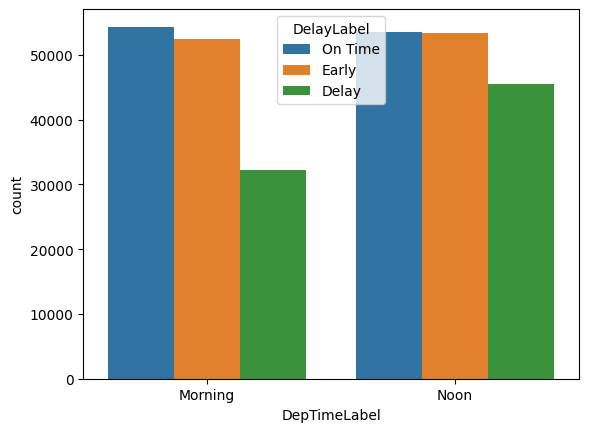

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x = 'DepTimeLabel', y = 'count', hue = 'DelayLabel', data = pdSeries_value_counts);

Minik aksaklıklar göz ardı edildiğinde, günün ikinci yarısında zamanında kalkan uçuşlar, gecikmeli kalkan uçuşlar ve erken kalkan uçuşlar neredeyse eşit dağılıma sahiptir. Fakat günün ilk yarısında nispeten daha az bir gecikmeli kalkış olduğu belirtilmelidir. Bu konuyu daha detaylı gün bölütlemeleri ile irdelemeye devam edelim.

In [17]:
def func_condition(x):
    if x < 900: x = 'Morning'
    elif x < 1200: x= 'Forenoon'
    elif x < 1500: x='Noon'
    else: x = 'Afternoon'
    return x

df_delay_deptime['DepTimeLabel'] = df_delay_deptime['DepTime'].apply(func_condition)

In [18]:
pdSeries_value_counts = df_delay_deptime.loc[:, ['DelayLabel', 'DepTimeLabel']].value_counts().to_frame()

In [19]:
pdSeries_value_counts

count
DelayLabel DepTimeLabel       
On Time    Forenoon      30808
Early      Forenoon      29666
On Time    Noon          28171
Early      Noon          27888
           Afternoon     25568
On Time    Afternoon     25327
           Morning       23543
Delay      Afternoon     23006
Early      Morning       22836
Delay      Noon          22532
           Forenoon      20844
           Morning       11343

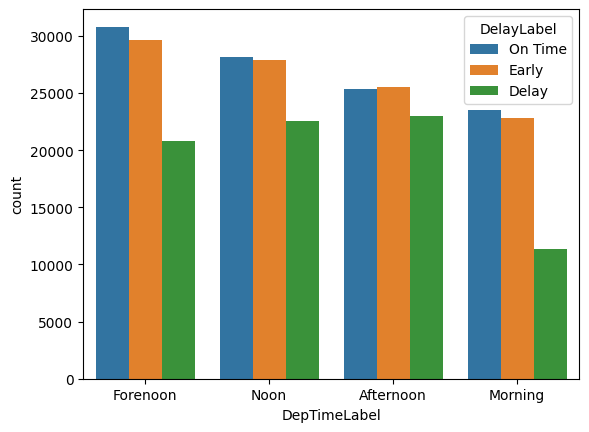

In [20]:
sns.barplot(x = 'DepTimeLabel', y = 'count', 
            hue = 'DelayLabel', 
            data = pdSeries_value_counts);

Bir de yüzdeliklerine göre grafiklendirelim.

In [21]:
pdSeries_value_counts.sort_values('DepTimeLabel')

,,count
DelayLabel,DepTimeLabel,
Early,Afternoon,25568
On Time,Afternoon,25327
Delay,Afternoon,23006
On Time,Forenoon,30808
Early,Forenoon,29666
Delay,Forenoon,20844
On Time,Morning,23543
Early,Morning,22836
Delay,Morning,11343


In [22]:
pdSeries_value_counts_sums = pdSeries_value_counts.groupby('DepTimeLabel').sum()
pdSeries_value_counts_sums

,count
DepTimeLabel,
Afternoon,73901
Forenoon,81318
Morning,57722
Noon,78591


In [23]:
pdSeries_vc_merged = pd.merge(
    left = pdSeries_value_counts.sort_values('DepTimeLabel'),
    right = pdSeries_value_counts_sums,
    on= 'DepTimeLabel',
    how = 'inner')

In [24]:
pdSeries_vc_merged.rename(columns={
    'count_x': 'DepTimeLabelCounts',
    'count_y': 'DepTimeLabelSums'
}, inplace=True)

In [25]:
pdSeries_vc_merged

,DepTimeLabelCounts,DepTimeLabelSums
DepTimeLabel,,
Afternoon,25568,73901
Afternoon,25327,73901
Afternoon,23006,73901
Forenoon,30808,81318
Forenoon,29666,81318
Forenoon,20844,81318
Morning,23543,57722
Morning,22836,57722
Morning,11343,57722


In [26]:
pdSeries_vc_merged['DepTimeLabelPercentages'] = pdSeries_vc_merged['DepTimeLabelCounts'] / pdSeries_vc_merged['DepTimeLabelSums'] * 100

pdSeries_vc_merged['DepTimeLabelPercentages'] = pdSeries_vc_merged['DepTimeLabelPercentages'].astype(int)

In [27]:
pdSeries_vc_merged = pdSeries_vc_merged.reset_index()

In [28]:
pdSeries_vc_merged

,DepTimeLabel,DepTimeLabelCounts,DepTimeLabelSums,DepTimeLabelPercentages
0,Afternoon,25568,73901,34
1,Afternoon,25327,73901,34
2,Afternoon,23006,73901,31
3,Forenoon,30808,81318,37
4,Forenoon,29666,81318,36
5,Forenoon,20844,81318,25
6,Morning,23543,57722,40
7,Morning,22836,57722,39
8,Morning,11343,57722,19
9,Noon,28171,78591,35


In [29]:
pdSeries_value_counts = pdSeries_value_counts.sort_values('DepTimeLabel').reset_index()
pdSeries_value_counts

,DelayLabel,DepTimeLabel,count
0,Early,Afternoon,25568
1,On Time,Afternoon,25327
2,Delay,Afternoon,23006
3,On Time,Forenoon,30808
4,Early,Forenoon,29666
5,Delay,Forenoon,20844
6,On Time,Morning,23543
7,Early,Morning,22836
8,Delay,Morning,11343
9,On Time,Noon,28171


True ve False değerleri de aynı dataframe üzerinde görebilmek adına bir merge işlemi daha gerçekleştirelim.

In [30]:
df_vc_merged = pdSeries_vc_merged.merge(
    pdSeries_value_counts,
    left_on = ['DepTimeLabel', 'DepTimeLabelCounts'],
    right_on= ['DepTimeLabel', 'count'],
    how = 'inner'
)
df_vc_merged 

,DepTimeLabel,DepTimeLabelCounts,DepTimeLabelSums,DepTimeLabelPercentages,DelayLabel,count
0,Afternoon,25568,73901,34,Early,25568
1,Afternoon,25327,73901,34,On Time,25327
2,Afternoon,23006,73901,31,Delay,23006
3,Forenoon,30808,81318,37,On Time,30808
4,Forenoon,29666,81318,36,Early,29666
5,Forenoon,20844,81318,25,Delay,20844
6,Morning,23543,57722,40,On Time,23543
7,Morning,22836,57722,39,Early,22836
8,Morning,11343,57722,19,Delay,11343
9,Noon,28171,78591,35,On Time,28171


Merge işleminin sonucunda count kolonunun ortak kolon olmasından ve how parametresinin left almasından kaynaklı kaybolması gerekirdi. Kaybolmuyor. 😑 Bende iloc ile yok ederim paraziti.

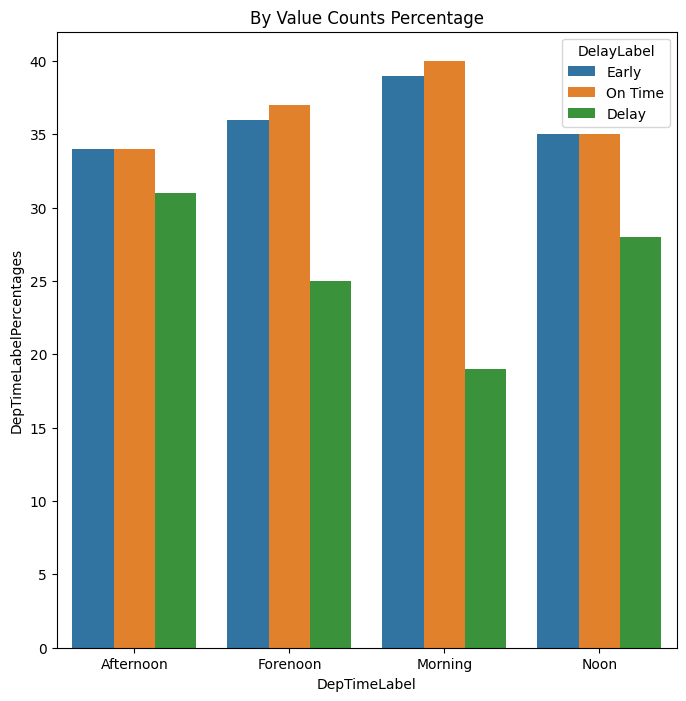

In [31]:
plt.figure(figsize=(8,8))

sns.barplot(x = 'DepTimeLabel', y = 'DepTimeLabelPercentages', hue = 'DelayLabel', data = df_vc_merged);

plt.title('By Value Counts Percentage');

Buradan yapabileceğimiz bilgi çıkarımları şunlardır:

Uçuş vaktinin, uçuşların ertelenmesi ile ilgili yegane temsilci olmadığı sezgisel olarak da zaten ortadadır. Fakat, vakit aralıklarında uçuşların kalkışında ne gibi uyumsuzluklar olduğunun çıkarımı kıymetlidir. 

Yukarıdaki grafikte edinebileceğimiz en önemli çıkarım, günün bu dört bölütünün (Morning, Forenoon, Noon, Afternoon) uçuşların kalkış zamanlasındaki değişkenlikleri açıklamak için **kullanılabileceğidir.** 

Apaçık görünmektedir ki, uçuşlardaki erteleme (Delay) sabah saatlerinde daha düşük seviyelerde seyrederken, gün ilerledikçe; yani Morning -> Forenoon -> Noon -> Afternoon sırası ile gittikçe artmaktadır. Gün ilerledikçe erken kalkışların sayısı da ufak bir artışa meyletse de çok büyük bir fark oluşmamıştır.

Son olarak kalkış zamanını veri setinde hazır olarak verilen bölütlemeye göre görselleştirelim.

In [32]:
df.DepTimeBlk.value_counts()

DepTimeBlk
1000-1059    29831
0800-0859    27551
1100-1159    27335
1200-1259    26952
1300-1359    26138
1400-1459    25501
1500-1559    24738
0900-0959    24152
1600-1659    22516
0700-0759    20001
1700-1759    18124
0600-0659    10170
1800-1859     8523
Name: count, dtype: int64

In [33]:
df_delay_deptime = df.loc[:, ['DepDelay', 'DepTimeBlk']]
df_delay_deptime

,DepDelay,DepTimeBlk
0,-4.0,1600-1659
1,-5.0,1000-1059
2,-4.0,1100-1159
3,-7.0,1200-1259
4,-3.0,0900-0959
...,...,...
291527,1191.0,1600-1659
291528,4.0,1600-1659
291529,81.0,1600-1659
291530,-2.0,1700-1759


In [34]:
df_delay_deptime['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)
df_delay_deptime

,DepDelay,DepTimeBlk,DelayLabel
0,-4.0,1600-1659,On Time
1,-5.0,1000-1059,Early
2,-4.0,1100-1159,On Time
3,-7.0,1200-1259,Early
4,-3.0,0900-0959,On Time
...,...,...,...
291527,1191.0,1600-1659,Delay
291528,4.0,1600-1659,On Time
291529,81.0,1600-1659,Delay
291530,-2.0,1700-1759,On Time


In [35]:
df_deptimeblk_label_vc = df_delay_deptime.iloc[:, 1:].value_counts().to_frame().reset_index()
df_deptimeblk_label_vc

,DepTimeBlk,DelayLabel,count
0,1000-1059,On Time,11353
1,0800-0859,On Time,11008
2,1000-1059,Early,10913
3,0800-0859,Early,10630
4,1100-1159,On Time,10000
5,1200-1259,On Time,9999
6,1100-1159,Early,9788
7,1200-1259,Early,9739
8,0900-0959,On Time,9455
9,1300-1359,Early,9286


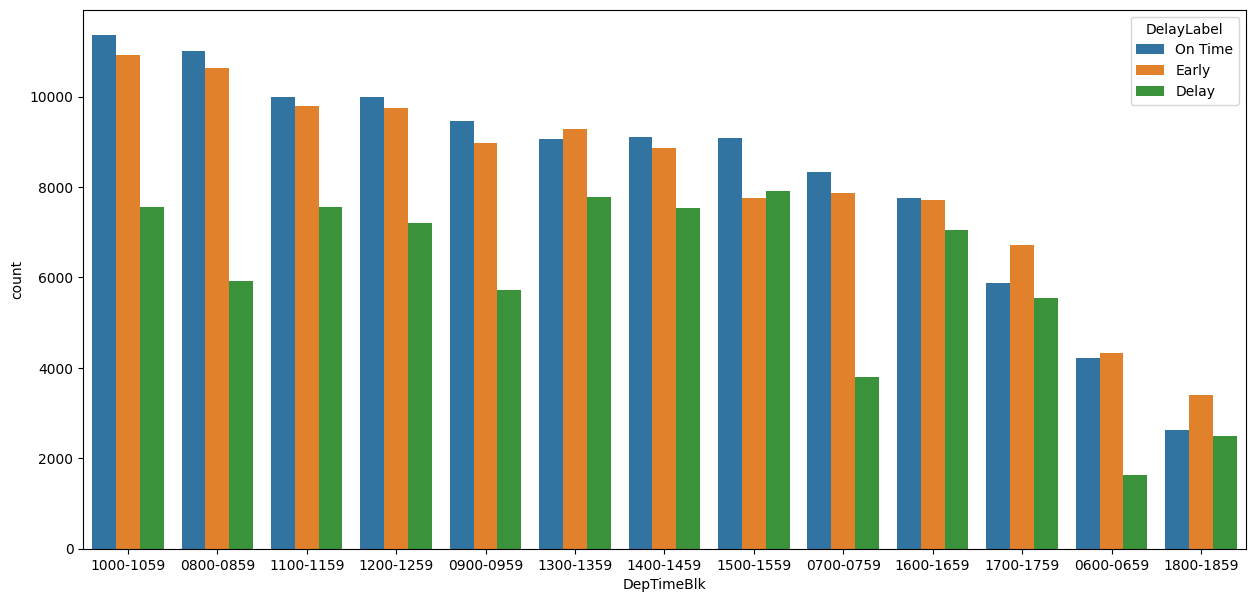

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'DepTimeBlk', y = 'count', hue = 'DelayLabel', data = df_deptimeblk_label_vc);

Şimdi de yüzdeliklerine göre dağıtalım

In [37]:
df_deptimeblk_sums = df_deptimeblk_label_vc.iloc[:, [0,2]].groupby('DepTimeBlk').sum().reset_index()

In [38]:
df_deptimeblk_sums

,DepTimeBlk,count
0,0600-0659,10170
1,0700-0759,20001
2,0800-0859,27551
3,0900-0959,24152
4,1000-1059,29831
5,1100-1159,27335
6,1200-1259,26952
7,1300-1359,26138
8,1400-1459,25501
9,1500-1559,24738


In [39]:
df_merged = df_deptimeblk_label_vc.merge(
    df_deptimeblk_sums,
    on = ['DepTimeBlk']
)
df_merged

,DepTimeBlk,DelayLabel,count_x,count_y
0,1000-1059,On Time,11353,29831
1,1000-1059,Early,10913,29831
2,1000-1059,Delay,7565,29831
3,0800-0859,On Time,11008,27551
4,0800-0859,Early,10630,27551
5,0800-0859,Delay,5913,27551
6,1100-1159,On Time,10000,27335
7,1100-1159,Early,9788,27335
8,1100-1159,Delay,7547,27335
9,1200-1259,On Time,9999,26952


In [40]:
df_merged['Percentages'] = (df_merged['count_x'] / df_merged['count_y'] * 100).astype(int)
df_merged.sort_values(by='DepTimeBlk', inplace=True)
df_merged

,DepTimeBlk,DelayLabel,count_x,count_y,Percentages
33,0600-0659,Early,4328,10170,42
34,0600-0659,On Time,4209,10170,41
35,0600-0659,Delay,1633,10170,16
24,0700-0759,On Time,8326,20001,41
26,0700-0759,Delay,3797,20001,18
25,0700-0759,Early,7878,20001,39
3,0800-0859,On Time,11008,27551,39
4,0800-0859,Early,10630,27551,38
5,0800-0859,Delay,5913,27551,21
14,0900-0959,Delay,5732,24152,23


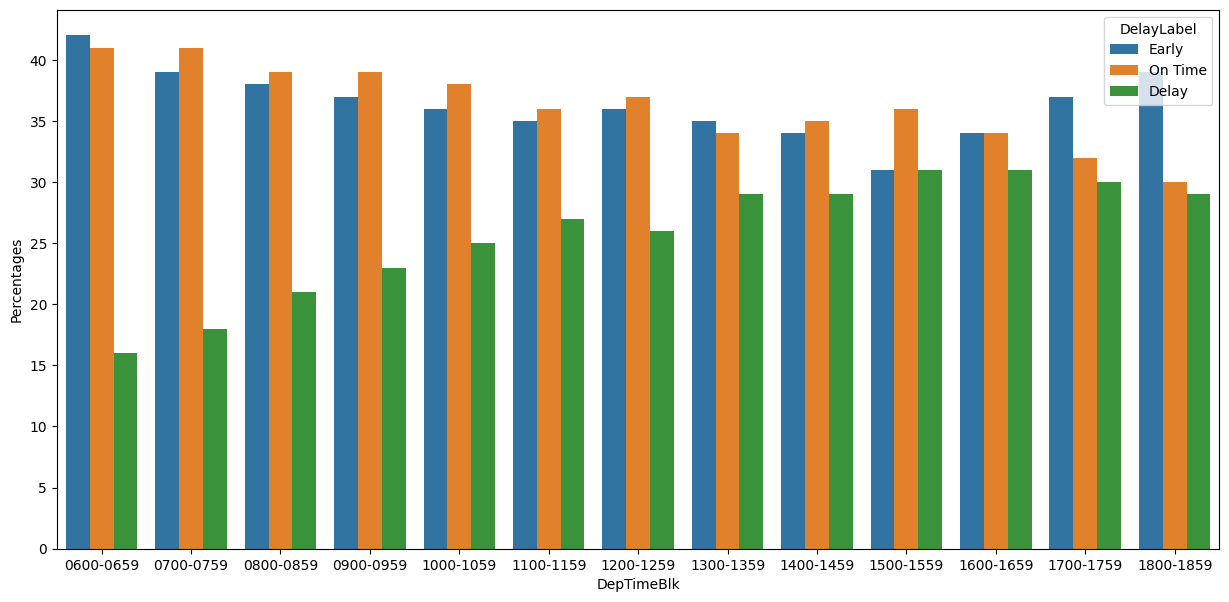

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'DepTimeBlk', y = 'Percentages', hue = 'DelayLabel', data = df_merged);

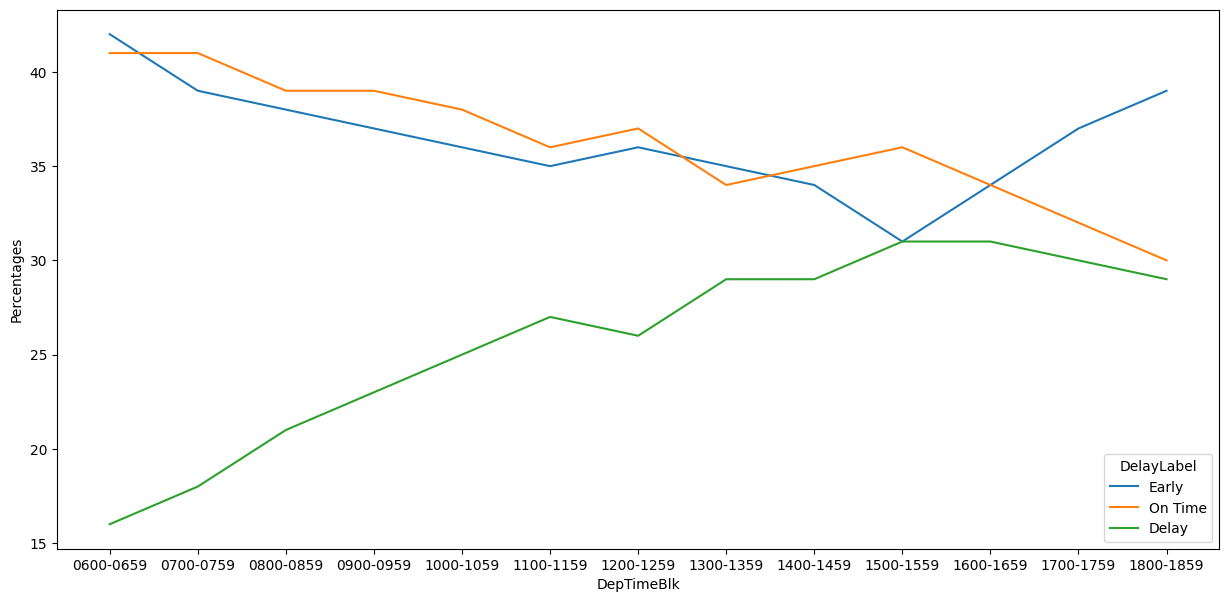

In [42]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'DepTimeBlk', y = 'Percentages', hue = 'DelayLabel', data = df_merged);

Bu grafik, önceki yaptıklarımıza göre çok daha geniş bir gün bölütlemesi içermektedir. Lineplot ile çizdirildiğinde daha iyi gözlemlenebilir. 

**Özellikle dikkat çeken hususlar şunlardır:**

_Delay (Uçuş ertelemesi)_: 
- Günün erken saatlerinden, saat 16'ya dek düzenli bir artış gözlemlendiğini söylemek yanlış olmaz. Akşam saatlerinde bu rakam çok ufak bir azalma seyretse de, stabilitesini koruduğunu söyleyebiliriz.

_Early (Erken kalkışlar)_: 
- Günün erken saatlerinde çok daha yüksek miktarda yaşandığı gözlemlenmektedir. Ertelenen uçuşlar ile arasında şöyle bir bağlantı kurulabilir: Saat 16'ya dek erken uçuş yaşanma ihtimali azalırken, erteleme yaşanma ihtimali gittikçe artmaktadır. Saat 15-16 sularında iki olayın gerçekleşmesi ihtimali neredeyse aynı, ve zamanında kalkış olma olasılığından düşük olarak gözlemlenirken. Bu zaman aralığının akabindeki saatlerde tekrardan erken kalkış durumları, gecikmeli kalkış durumlarının önüne geçmektedir.

_On-Time (Zamanında kalkış)_: 
- Bilindiği üzere 5 dakikalık gecikmeler ve erken kalkışlar göz ardı edilmiş ve bu kategoride değerlendirilmiştir. Gün ilerledikçe vakitli kalkışların gözlemlenme sıklığında düzenli bir düşüş seyretmektedir. 13-15 sularında bu gözlemlemeler ufak bir artışa işaret etse de, saat 15'den sonra kusursuz bir düzenlilikle düşüş seyri devam etmektedir. Belirtilmelidir ki, saat 17'ye dek, zamanında kalkış yaşanma seyri, diğer olayların seyrine kıyasla daha sık görülmektedir. Yine de erken kalkışların yaşanma seyri de neredeyse zamanında kalkışların gerçekleşmesi seyri ile örtüşmektedir. Saat 17'den sonra ise Erken kalkışların seyri, zamanında kalkışların önüne geçmiş ve günün kapanışına kadar (veri setimiz için saat 19'a dek) bu fark açılmıştır.

----

Devam etmeden önce **DelayLabel** kolonunu orjinal veri setine de ekleyelim. Görünen o ki çoklu sınıflandırma için kullanıalcak hedef değişkenimiz o olacak.

In [43]:
df['DelayLabel'] = df_delay_deptime['DepDelay'].apply(funcDepDelayLabel)
df.head()

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepTimeBlk,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by OriginAirportID,Merged by DestAirportSeqID,Merged by CRSArrTime,Merged by Distance,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,DelayLabel
0,1582,1631,1627.0,1600-1659,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1169706 / 11697 / 32467 / FLL / Fort Lauderdal...,1821 / 1800-1859,581.0 / 3,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0,On Time
1,1583,1024,1019.0,1000-1059,17.0,3.0,1212.0,0.0,0.0,123.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N345NB,DL / 19790 / DL,11697 / 1169706 / 32467 / FLL / Fort Lauderdal...,1449202 / 14492 / 34492 / RDU / Raleigh/Durham...,1227 / 1200-1259,680.0 / 3,-5.0,0.0,0.0,-1.0,-5.0,0.0,0.0,-1.0,Early
2,1584,1117,1113.0,1100-1159,14.0,4.0,1131.0,0.0,0.0,85.0,78.0,60.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,"10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...",1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...,1142 / 1100-1159,341.0 / 2,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0,On Time
3,1584,1237,1230.0,1200-1259,11.0,5.0,1435.0,0.0,0.0,81.0,65.0,49.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...,"1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",1458 / 1400-1459,341.0 / 2,-7.0,0.0,0.0,-1.0,-7.0,0.0,0.0,-1.0,Early
4,1585,900,857.0,0900-0959,13.0,8.0,1038.0,0.0,0.0,110.0,101.0,80.0,1.0,0,DL / DL / 19790 / DL / N878DN,DL / 19790 / DL,"14524 / 1452401 / 34524 / RIC / Richmond, VA /...","1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...",1050 / 1000-1059,481.0 / 2,-3.0,0.0,0.0,-1.0,-3.0,0.0,0.0,-1.0,On Time


Sıradan devam edelim: **Flight_Number_Marketing_Airline**

In [44]:
df_flightnum_vc = df.Flight_Number_Marketing_Airline.value_counts().to_frame().reset_index()
df_flightnum_vc

,Flight_Number_Marketing_Airline,count
0,2438,183
1,1537,168
2,493,165
3,464,162
4,2368,155
...,...,...
6230,8772,1
6231,6161,1
6232,3334,1
6233,8812,1


In [45]:
df_flightnum_dellabel_vc = df[['Flight_Number_Marketing_Airline', 'DelayLabel']].value_counts().to_frame().reset_index()
df_flightnum_dellabel_vc

,Flight_Number_Marketing_Airline,DelayLabel,count
0,5066,Early,82
1,2058,Early,78
2,3693,Early,77
3,3651,Early,76
4,2368,On Time,76
...,...,...,...
18001,275,Early,1
18002,956,Early,1
18003,2946,Delay,1
18004,5810,On Time,1


In [46]:
df_merged = pd.merge(
    df_flightnum_vc,
    df_flightnum_dellabel_vc,
    on = ['Flight_Number_Marketing_Airline'],
    suffixes=['_flightnum', '_flightnum_dellabel']
)
df_merged

,Flight_Number_Marketing_Airline,count_flightnum,DelayLabel,count_flightnum_dellabel
0,2438,183,Early,69
1,2438,183,On Time,63
2,2438,183,Delay,51
3,1537,168,On Time,75
4,1537,168,Delay,49
...,...,...,...,...
18001,8772,1,Delay,1
18002,6161,1,Early,1
18003,3334,1,Delay,1
18004,8812,1,Early,1


In [47]:
df_merged['PercentageOfCounts'] = (df_merged['count_flightnum_dellabel'] / df_merged['count_flightnum'] * 100).astype(int)
df_merged

,Flight_Number_Marketing_Airline,count_flightnum,DelayLabel,count_flightnum_dellabel,PercentageOfCounts
0,2438,183,Early,69,37
1,2438,183,On Time,63,34
2,2438,183,Delay,51,27
3,1537,168,On Time,75,44
4,1537,168,Delay,49,29
...,...,...,...,...,...
18001,8772,1,Delay,1,100
18002,6161,1,Early,1,100
18003,3334,1,Delay,1,100
18004,8812,1,Early,1,100


Bu şekilde çok anlamlı olmadı. Az uçuşları elememız lazım. Peki bu uçuşların gerçekleşme sıktıkları nasıl bir dağılım gözetiyor? Önce bunu görselleştirelim.

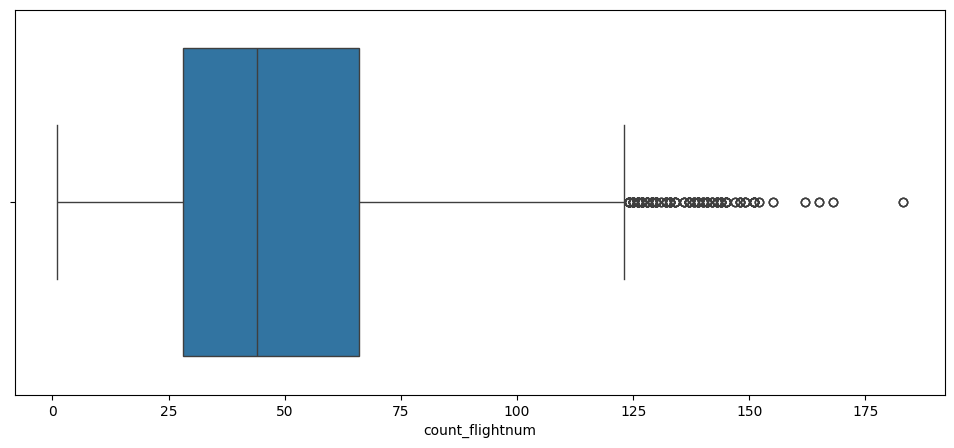

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df_merged['count_flightnum']);

Gözlemlenebileceği üzere 25'den sonra bir yığılma var. Düşük değerleri elemek istiyoruz. O halde 25'i eşik değer olarak belirleyebiliriz.

In [49]:
df_merged[df_merged['count_flightnum'] > 25].sort_values(by='PercentageOfCounts', ascending=False).head(10)

,Flight_Number_Marketing_Airline,count_flightnum,DelayLabel,count_flightnum_dellabel,PercentageOfCounts
12490,2018,31,Early,27,87
13158,4325,29,Early,25,86
6813,3121,56,Early,47,83
13331,2219,28,On Time,23,82
11557,890,33,On Time,27,81
11545,5905,33,Early,27,81
13699,3588,27,Early,22,81
12601,6011,30,Delay,24,80
11171,430,35,Delay,28,80
7857,2764,51,Early,40,78


Bu tablodan gözlemleyebileceğimiz üzere, bazı uçuşlarda **(Flight_Number_Marketing_Airline)** düzenli olarak daha erken kalkış söz konusu iken bazılarıda ise daha yüksek oranda gecikme yaşanabilmektedir. Bu değişkenimiz de **DelayLabel** temsilcisi olarak modelin içerisinde yer bulmalıdır.

İnceleyeceğimiz bir sonraki öznitelik, **TaxiOut** ve **TaxiIn** olacak.
Kalkıştaki ertelenmelerin tahminleneceğini göz önünde bulundurduğumuzda burada asıl incelenmesi gereken öznitelik **TaxiOut**'tur. TaxiIn bizim problemimiz için veri setinden çıkarılabilir.

In [50]:
df.loc[:, ['TaxiOut']].describe().T

,count,mean,std,min,25%,50%,75%,max
TaxiOut,291532.0,17.479896,10.272836,1.0,11.0,15.0,20.0,186.0


In [51]:
df.loc[:, ['TaxiOut']].value_counts()

TaxiOut
12.0       23816
13.0       22891
11.0       22511
14.0       21195
10.0       20218
           ...  
131.0          1
144.0          1
143.0          1
142.0          1
186.0          1
Name: count, Length: 157, dtype: int64

TaxiOut'u kategorilere ayırmaya çalışalım.

In [52]:
def func_taxiout_label(x):
    if x < 10: x = 'x<10' 
    elif x < 15: x = '10>x<15' 
    elif x < 20: x = '15>x<20' 
    else: x='x>20'
    return x


In [53]:
df['TaxiOutLabel'] = df['TaxiOut'].apply(func_taxiout_label)

In [54]:
df['TaxiOutLabel'].value_counts()

TaxiOutLabel
10>x<15    110631
x>20        77729
15>x<20     70251
x<10        32921
Name: count, dtype: int64

Öncelikle akla gelen soru şudur: 
TaxiOut süresine aşağıdakilerden birisi etki ediyor olabilir mi?
- Uçuşun günün hangi diliminde gerçekleşiyor olduğu etkiliyor mu? (DepTimeBlk)
- Uçuşun hangi Uçuş Numarasına sahip olduğu etkiliyor mu? (Flight_Number_Marketing_Airline)

In [55]:
df_taxiout_deptime_vc = df.loc[:, ['TaxiOutLabel', 'DepTimeBlk']].value_counts().to_frame().reset_index()
df_taxiout_deptime_vc

,TaxiOutLabel,DepTimeBlk,count
0,10>x<15,1200-1259,11463
1,10>x<15,1100-1159,11043
2,10>x<15,1300-1359,10760
3,10>x<15,1000-1059,10617
4,10>x<15,1400-1459,10394
5,10>x<15,1500-1559,10156
6,x>20,0800-0859,9943
7,10>x<15,1600-1659,8872
8,10>x<15,0800-0859,8664
9,x>20,1000-1059,8511


Hey bir saniye! Düzenli olarak yaptığımız şu işi belki de çok daha önce fonksiyonel hale getirip zaman kazanmamız gerekirdi. Artık yapalım 😊

In [56]:
def grupla_ve_yüzdele(df, att1, att2, plot=None):
    df_vc = df[[att1, att2]].value_counts().to_frame().reset_index()
    df_vc2 = df[[att1, att2]].value_counts().to_frame().groupby(att2).sum().reset_index()

    df_merged = pd.merge(
        df_vc,
        df_vc2,
        on = att2, 
        suffixes=['_'+att1, '_'+att2]
    )
    df_merged['Percentage'] = (df_merged['count_'+att1] / df_merged['count_'+att2] * 100).astype(int)

    if plot == 'bar':
        plt.figure(figsize=(15,6))
        sns.barplot(data = df_merged, hue = att1, x = att2, y='Percentage')
        plt.show()

    elif plot == 'line':
        plt.figure(figsize=(15,7))
        sns.lineplot(data = df_merged, hue = att1, x = att2, y='Percentage')
        plt.show()

    return df_merged.sort_values(by='Percentage', ascending=False)

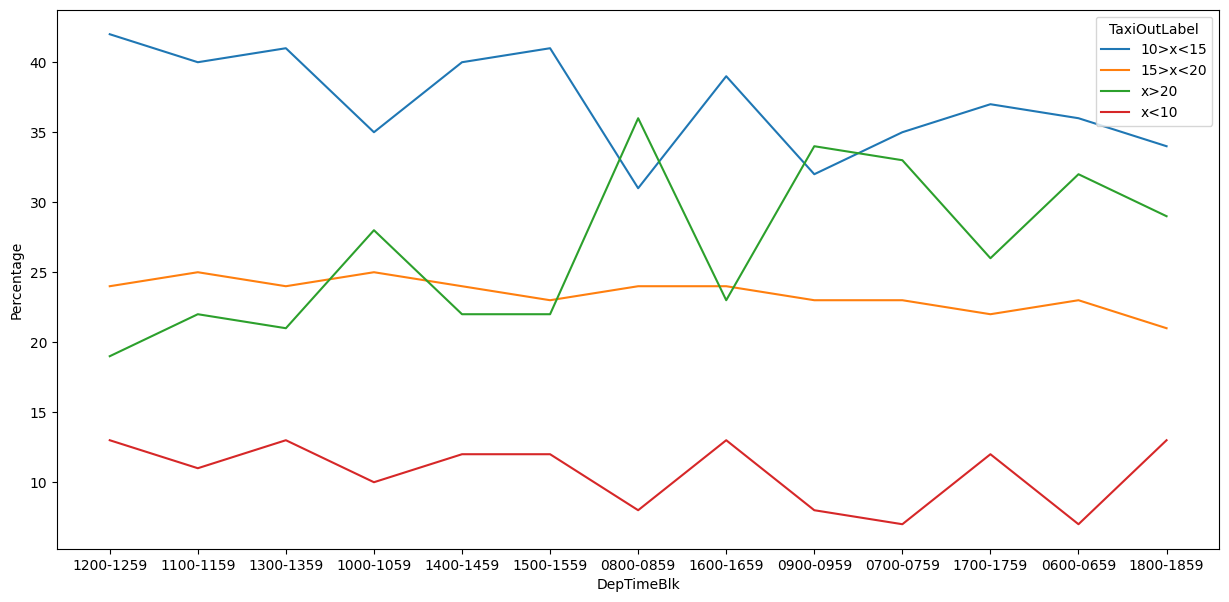

In [57]:
df_merged = grupla_ve_yüzdele(
    df=df, 
    att1= 'TaxiOutLabel', 
    att2='DepTimeBlk',
    plot='line'
)

Grafikten gözlemleyebileceğimiz üzere, TaxiOut zamanının, kalkışın günün hangi diliminde gerçekleşmesi ile bir bağlantısı yoktur. Her bir taksi süresi için artışlar ve azalışlar günün saatlerine göre oldukça anlamsız seyretmektedir.

Peki ya Flight_Number_Marketing_Airline ile bir bağlantısı var mı? Artık fonksiyonumuz ile hızlıca gözlem yapabiliriz 😊 

Lakin Flight_Number_Marketing_Airline fazla aykırı gözlem içerdiğinden dolayı bazı gözlemleri elememiz gerek. Aksi taktirde işlemimiz çok uzun sürebilir ve grafik anlamlı olmayabilir.

In [58]:
df.Flight_Number_Marketing_Airline.value_counts() #sonuçlar ortada...

Flight_Number_Marketing_Airline
2438    183
1537    168
493     165
464     162
2368    155
       ... 
8772      1
6161      1
3334      1
8812      1
4463      1
Name: count, Length: 6235, dtype: int64

In [59]:
df_fn_vc = df.Flight_Number_Marketing_Airline.value_counts().to_frame().reset_index()

In [60]:
df_fn_vc

,Flight_Number_Marketing_Airline,count
0,2438,183
1,1537,168
2,493,165
3,464,162
4,2368,155
...,...,...
6230,8772,1
6231,6161,1
6232,3334,1
6233,8812,1


In [61]:
fn_list_array = df_fn_vc[df_fn_vc['count']>145]['Flight_Number_Marketing_Airline'].values

In [62]:
df_taxiout_flightnum = df[['TaxiOutLabel', 'Flight_Number_Marketing_Airline']][df['Flight_Number_Marketing_Airline'].isin(fn_list_array)].reset_index(drop=True)
df_taxiout_flightnum

,TaxiOutLabel,Flight_Number_Marketing_Airline
0,10>x<15,1623
1,x<10,1710
2,x<10,1710
3,10>x<15,2301
4,15>x<20,2301
...,...,...
2325,10>x<15,4232
2326,10>x<15,4232
2327,10>x<15,4232
2328,15>x<20,4232


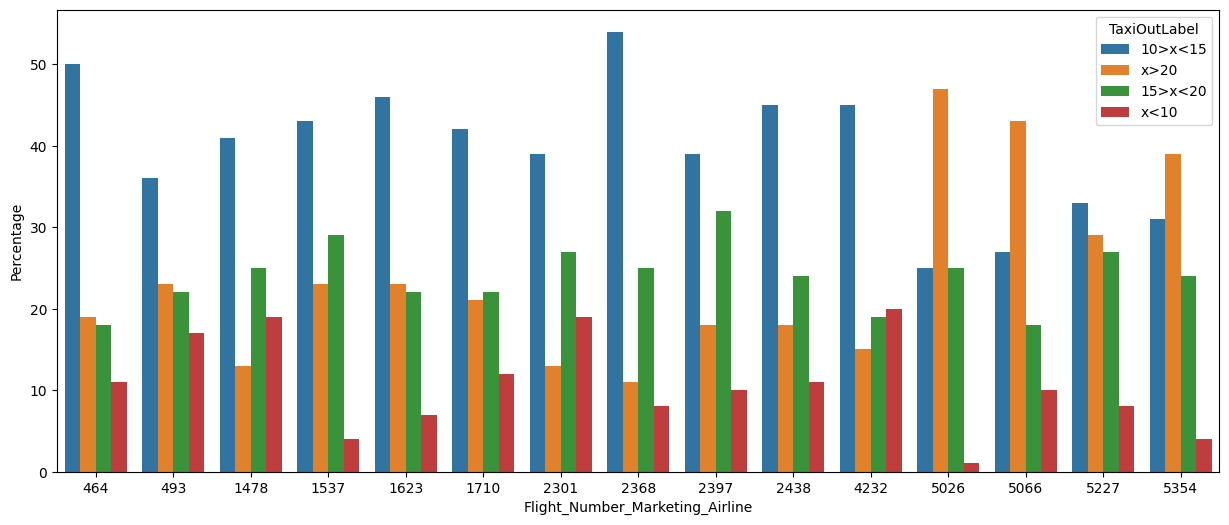

In [63]:
df_merged = grupla_ve_yüzdele(
    df=df_taxiout_flightnum, 
    att1= 'TaxiOutLabel', 
    att2='Flight_Number_Marketing_Airline',
    plot='bar'
)

Öyle görünmektedir ki bazı uçuş numaralı uçuşlarda uçağın taksi sürekli gerçekten de diğerlerine göre daha fazla seyretmektedir. Bazı uçuş numaralı uçakların, hava trafiği noktasında önceliklendirilmesi söz konusu olabilir.

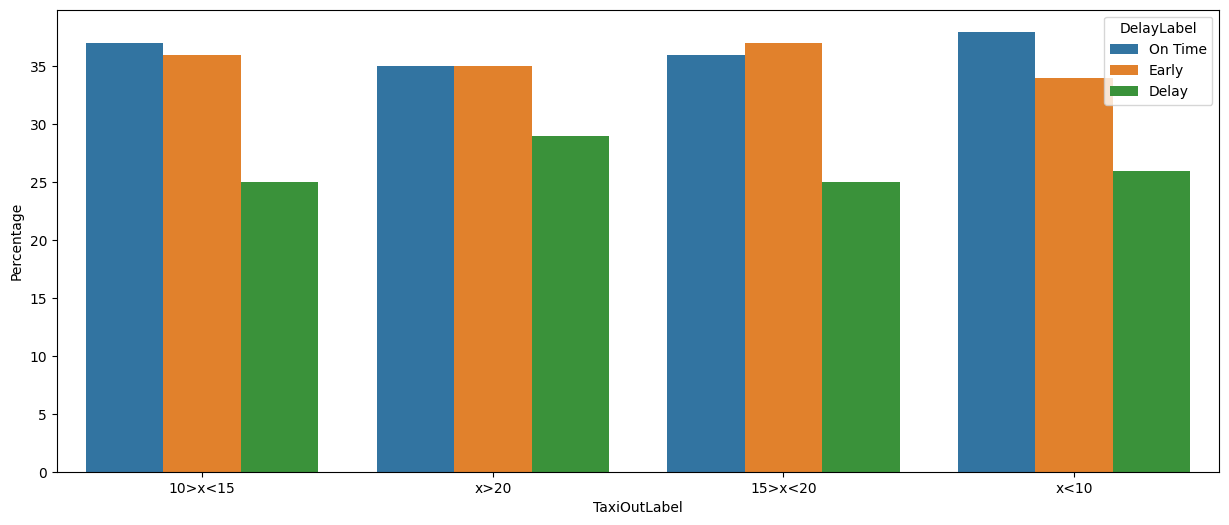

In [64]:
df_merged = grupla_ve_yüzdele(
    df=df, 
    att1= 'DelayLabel', 
    att2='TaxiOutLabel',
    plot='bar'
)

Oysa taksi süresinin planlanan kalkış süresi ile düşünülenin aksine doğrudan bir ilişkisi bulunmamaktadır. Taksi süresi muhtemelen önceden tahmin edilip, uçağın pissten ayrılış süresi ona göre planlanmaktadır. Aksi halde, 20 dakikanın üzerinde taksi süresi olan uçaklar "DelayLabel" anlamında "On Time" sınıfına girememeleri gerekirdi.

Sonuç olarak, **TaxiOut** bizim problemimiz için modelleme safhasında **kullanılmamalıdır!**

**ArrTime** 'ın ayrıca değerlendirilmesine gerek olmadığı çok açıktır.

**Cancalled** durumlarının dağılımına göz atalım.

In [65]:
df.Cancelled.value_counts()
# Veri seti için herhangi bir uçuş iptal durumu söz konusu değildir

Cancelled
0.0    291532
Name: count, dtype: int64

**Diverted** durumlarının dağılımına göz atalım.

In [66]:
df.Diverted.value_counts()
# Veri seti için herhangi bir varış noktası değikliği durumu söz konusu değildir

Diverted
0.0    291532
Name: count, dtype: int64

Elapsed Time için iki farklı attribute mevcuttur: **CRSElapsedTime** ve **ActualElapsedTime**

**ElapsedError** = CRSElapsedTime - ActualElapsedTime

şeklinde yeni bir değişken türetebiliriz. 

Ardından bu değişkenin hedef değişken ile ile birliktelik analizini gerçekleştirilecektir.


In [67]:
df['ElapsedError'] = df['CRSElapsedTime'] - df['ActualElapsedTime']

In [68]:
df.ElapsedError.describe()

count    291532.000000
mean          7.575995
std          14.240126
min        -220.000000
25%           1.000000
50%           9.000000
75%          16.000000
max         173.000000
Name: ElapsedError, dtype: float64

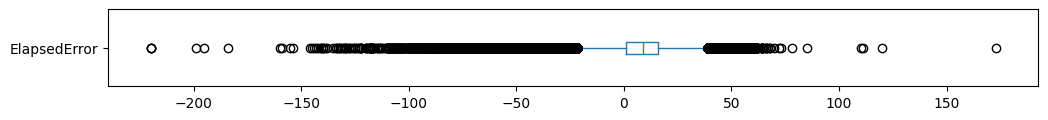

In [69]:
plt.figure(figsize=(12,1))
df.ElapsedError.plot.box(vert=False);

In [70]:
def func_elapsed_error_label(x):
    if x < 0: x = 'Took Shorter than Planned'
    elif x < 10: x = 'Hitch (<10 min)'
    elif x < 20: x = 'Hitch (<20 min)'
    else: x = 'Bad Timing (>20 min)'
    return x

In [71]:
df['ElapsedErrorLabel'] = df['ElapsedError'].apply(func_elapsed_error_label)

In [72]:
df['ElapsedErrorLabel'].value_counts()

ElapsedErrorLabel
Hitch (<20 min)              97043
Hitch (<10 min)              90708
Took Shorter than Planned    60047
Bad Timing (>20 min)         43734
Name: count, dtype: int64

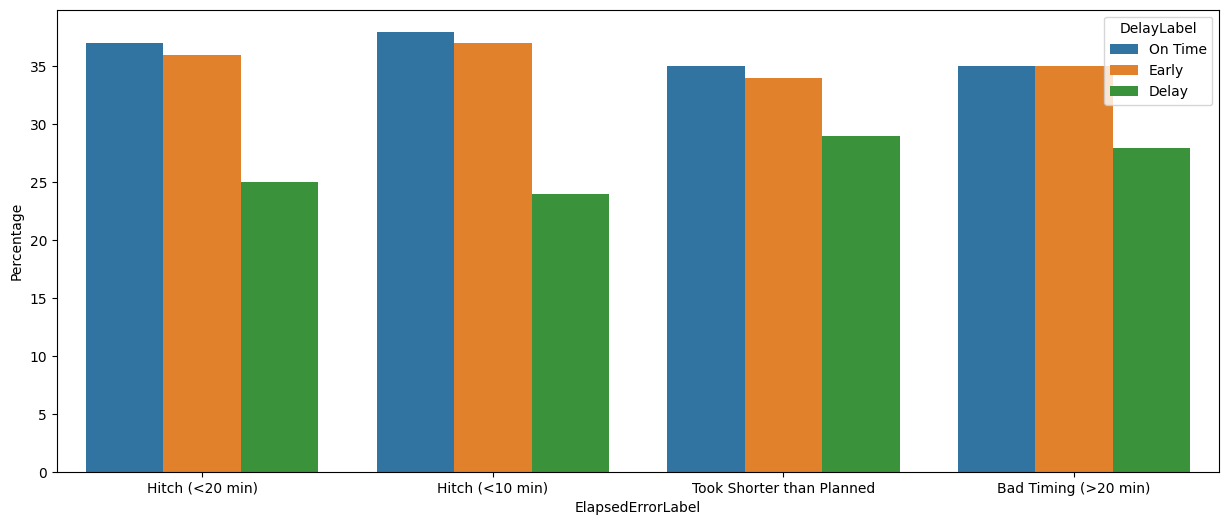

In [73]:
df_merged = grupla_ve_yüzdele(
    df=df,
    att1='DelayLabel',
    att2='ElapsedErrorLabel',
    plot='bar'
)

Görüleceği üzere Elapsed sürede meydana gelen aksaklığın DelayLabel üzerinde etkisi oldukça düşüktür.

İnceleyeceğimiz bir sonraki değişken **AirTime** olacak. 

In [74]:
df.AirTime.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
AirTime,291532.0,103.142811,60.510583,13.0,58.0,89.0,132.0,522.0


In [75]:
def func_air_time_label(x):
    if x < 60: x= 'Short Flight'
    elif x < 120: x='Medium Flight'
    else: x = 'Long Flight'
    return x

In [76]:
df['AirTimeLabel'] = df['AirTime'].apply(func_air_time_label)

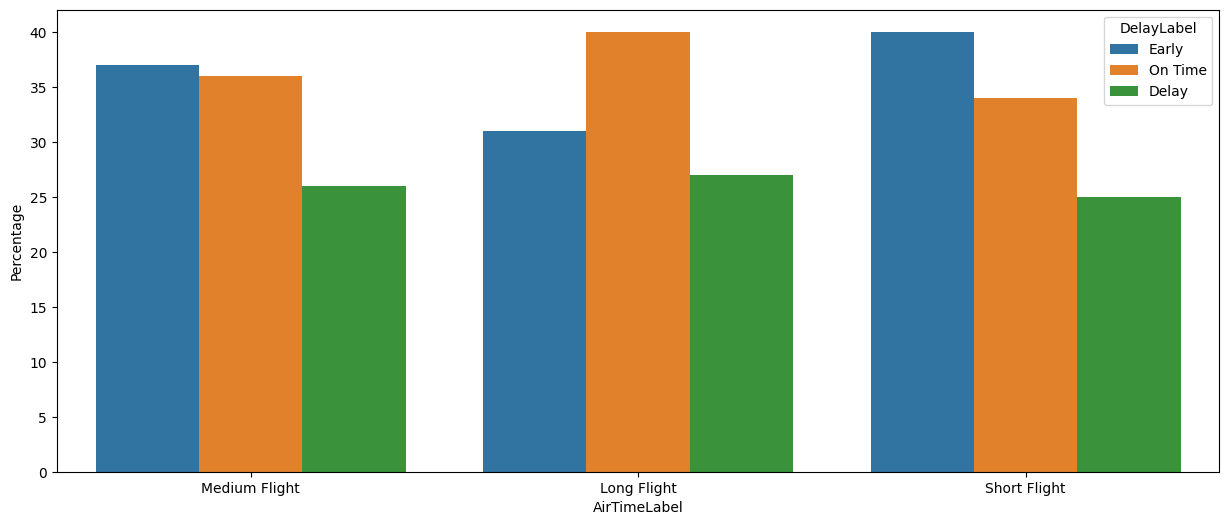

In [77]:
df_merged = grupla_ve_yüzdele(
    df=df,
    att1='DelayLabel', 
    att2='AirTimeLabel',
    plot='bar'
)

Gözlemlenmektedir ki, uçuşların ertelenmesi ile uçuşun ne kadar uzak mesafeye yapıldığoı (Airtime) arasında bir bağıntı olmasa da, kısa uçuş sürelerinde zamanından önce kalkışlar daha olasıdır. Uçuş süresi uzadıkça uçuşlar doğru zamanda (On Time) kalkmaya meyletmektedir.

Dolayısıyla **AirTime** özniteliği modellemede kullanılabilir.

Kalkışın yapıldığı havalimanı ile planlanan kalkıştaki farklılıklar bağlantılı olmalı. Bunu gözlemleyebilmek adına **Merged by OriginAirportID** kolonunu gözlemleyelim.

In [78]:
df['Merged by OriginAirportID']

0         10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...
1         11697 / 1169706 / 32467 / FLL / Fort Lauderdal...
2         10397 / 1039707 / 30397 / ATL / Atlanta, GA / ...
3         12448 / 1244807 / 32448 / JAN / Jackson/Vicksb...
4         14524 / 1452401 / 34524 / RIC / Richmond, VA /...
                                ...                        
291527    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291528    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291529    11003 / 1100303 / 31003 / CID / Cedar Rapids/I...
291530    11298 / 1129806 / 30194 / DFW / Dallas/Fort Wo...
291531    11298 / 1129806 / 30194 / DFW / Dallas/Fort Wo...
Name: Merged by OriginAirportID, Length: 291532, dtype: object

In [79]:
new_columns = df['Merged by OriginAirportID'].str.split(' / ', expand=True)
new_columns

,0,1,2,3,4,5,6,7,8
0,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
1,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
2,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
3,12448,1244807,32448,JAN,"Jackson/Vicksburg, MS",MS,28,Mississippi,53
4,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38
...,...,...,...,...,...,...,...,...,...
291527,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61
291528,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61
291529,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61
291530,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74


In [80]:
df_originAirport = new_columns.iloc[:,3].to_frame().rename(columns={3: 'OriginAirport'})
df_originAirport

,OriginAirport
0,ATL
1,FLL
2,ATL
3,JAN
4,RIC
...,...
291527,CID
291528,CID
291529,CID
291530,DFW


In [81]:
df = pd.concat(
    [df, df_originAirport], axis=1
)

In [82]:
df.drop('Merged by OriginAirportID', axis=1, inplace=True)

In [83]:
df_airport_vc = df['OriginAirport'].value_counts().to_frame().reset_index()
df_airport_vc

,OriginAirport,count
0,ATL,14881
1,ORD,14509
2,DFW,13712
3,CLT,11476
4,DEN,11294
...,...,...
313,ART,13
314,CGI,10
315,CYS,3
316,ATY,2


In [84]:
airport_selected_counts_list = df_airport_vc[df_airport_vc['count'] > 10000]['OriginAirport'].values.tolist()
airport_selected_counts_list

['ATL', 'ORD', 'DFW', 'CLT', 'DEN']

In [85]:
df2 = df[df['OriginAirport'].isin(airport_selected_counts_list)].reset_index(drop=True)

In [86]:
df2.shape

(65872, 33)

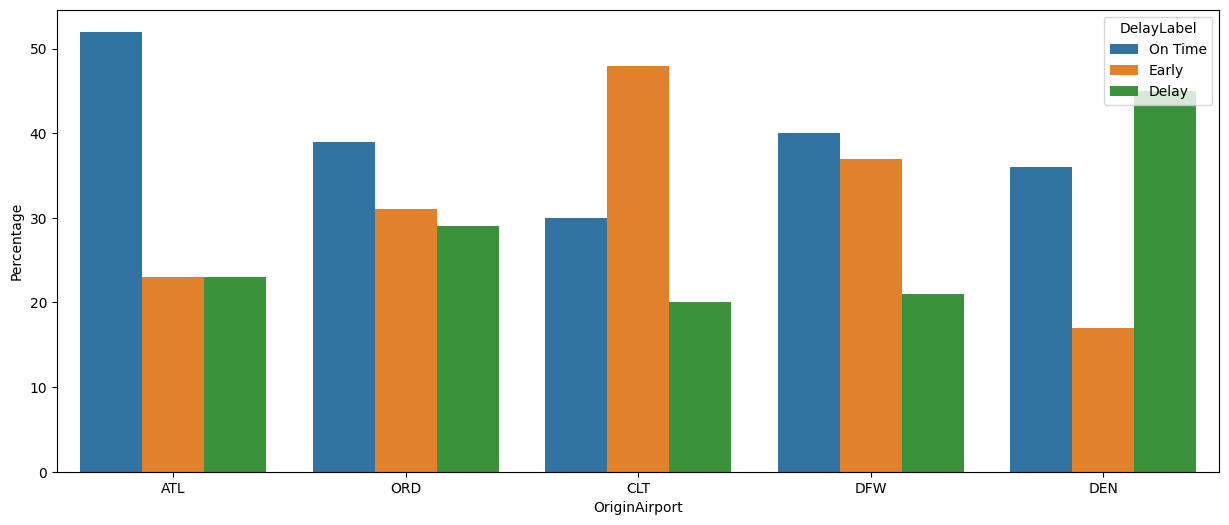

In [87]:
df_merged = grupla_ve_yüzdele(
    df2,
    'DelayLabel', 'OriginAirport',
    'bar'
)

Bu grafik, veri setinde en çok uçuş kalkışı gerçekleştiren 5 büyük havalimanı üzerinden çizdirilmiştir. Rahatlıkla gözlemlenmektedir ki, DelayLabel kolonu, kalkışın gerçekleştiği havalimanına göre değişiklik göstermektedir. Dolasıyıla, modelleme safhasında yeterince kalkışın gerçekleşmediği havalimanları verisetinden çıkartılarak, bir önceki aşamada merge edilen **Merged by OriginAirportID** isimli kolonun sadece havalimanı şehir isimlerinin kısaltmalarını tutacak şekilde revize edilmesi ile oluşturulan **OriginAirport** isimli kolondan faydalanılacaktır.

Peki aynı durum inişin yapılacağı havalimanı için de geçerli mi? **Merged by DestAirportSeqID:** incelensin! ✨

In [88]:
df['Merged by DestAirportSeqID']

0         1169706 / 11697 / 32467 / FLL / Fort Lauderdal...
1         1449202 / 14492 / 34492 / RDU / Raleigh/Durham...
2         1244807 / 12448 / 32448 / JAN / Jackson/Vicksb...
3         1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...
4         1039707 / 10397 / 30397 / ATL / Atlanta, GA / ...
                                ...                        
291527    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291528    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291529    1129806 / 11298 / 30194 / DFW / Dallas/Fort Wo...
291530    1342202 / 13422 / 30562 / MOB / Mobile, AL / A...
291531    1342202 / 13422 / 30562 / MOB / Mobile, AL / A...
Name: Merged by DestAirportSeqID, Length: 291532, dtype: object

In [89]:
new_columns = df['Merged by DestAirportSeqID'].str.split(' / ', expand=True)

df_originAirport = new_columns.iloc[:,3].to_frame().rename(columns={3: 'DestAirport'})

df = pd.concat(
    [df, df_originAirport], axis=1
)

df.drop('Merged by DestAirportSeqID', axis=1, inplace=True)

df_airport_vc = df['DestAirport'].value_counts().to_frame().reset_index()

airport_selected_counts_list = df_airport_vc[df_airport_vc['count'] > 10000]['DestAirport'].values.tolist()
airport_selected_counts_list

['DFW', 'ORD', 'ATL', 'DEN', 'CLT']

In [90]:
df2 = df[df['DestAirport'].isin(airport_selected_counts_list)].reset_index(drop=True)

df2.shape

(70343, 33)

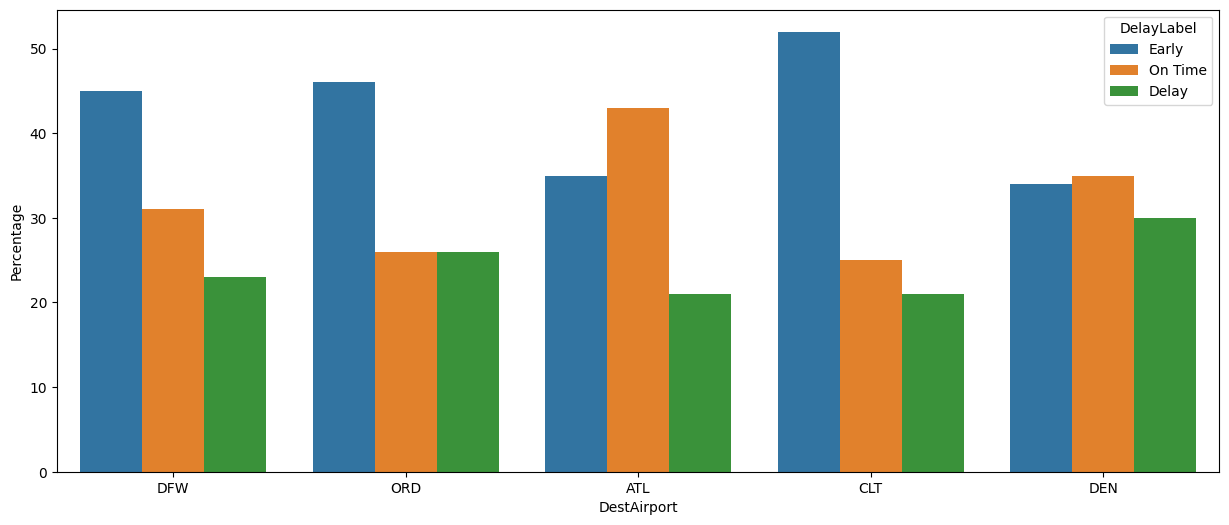

In [91]:
df_merged = grupla_ve_yüzdele(
    df2,
    'DelayLabel', 'DestAirport',
    'bar'
)

Gözlemlenebileceği üzere varış havalimanı da, planlanan kalkış zamanında değişikliklere sebep olmaktadır. Fakat sezgisel olarak yaklaşıldığında DelayLabel-DestAirport ilişkisinin daha tesadüfi bir dağılım sergilediği sonucuna varılabilir. Kalkışta yaşanacak bir gecikme, kalkışın yapıldığı havalimanındaki pek çok etmene bağlı olabilme potansiyeli taşırken, inişin gerçekleşeceği havalimanı ile bağlantılı olma ihtimali çok daha düşüktür. Dolayısıyla **Merged by DestAirportSeqID**, ya da seyreltilmiş olarak oluşturulan yeni öznitelik adıyla **DestAirport** modelleme safhasında kullanılmayacaktır.

Son olarak **Merged by Distance** özniteliği kalmıştır. Havada geçirilen zaman halihazırda modelleme safhasına dahil edilecektir. Bahsi geçen Merged by Distance özniteliği ile Havada geçen zaman (AirTime) yüksek bir korelasyon halindedir. Ayrıca bu özniteliğin modelleme safhasında **yer almasına gerek yoktur**.

----

**Sınıflandırma** için hedef değişken seçimini yapabilmek adına veriden hazır özniteliklerden (DepDel15 ya da DepatureDelayGroups) yararlanılmalı mı, yoksa yeni bir sınıflandırma özniteliği oluşturulmalı mı? Bu incelenecektir.

In [92]:
for i in df.iloc[:, -2:].columns:
    print(df.loc[:, i].value_counts(), '\n', '-'*40)

OriginAirport
ATL    14881
ORD    14509
DFW    13712
CLT    11476
DEN    11294
       ...  
ART       13
CGI       10
CYS        3
ATY        2
PIR        2
Name: count, Length: 318, dtype: int64 
 ----------------------------------------
DestAirport
DFW    15748
ORD    15497
ATL    14336
DEN    13237
CLT    11525
       ...  
ALS       13
CGI        8
PIR        2
ATY        2
CYS        1
Name: count, Length: 317, dtype: int64 
 ----------------------------------------


In [93]:
target = df['DepDelay']

In [94]:
target.describe()

count    291532.000000
mean          9.647226
std          46.828830
min         -49.000000
25%          -6.000000
50%          -3.000000
75%           6.000000
max        2501.000000
Name: DepDelay, dtype: float64

### 1. Aykırı Değer Analiz


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

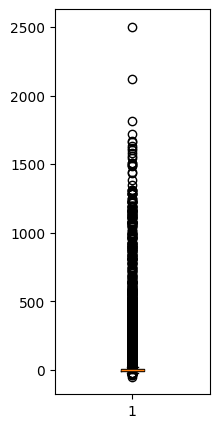

In [96]:
plt.figure(figsize=(2,5))
plt.boxplot(target);

# İncelenebileceği üzere aykırı değerler veri üzerinde gürültü oluşturmaktadır.

Aykırı değerleri ayıklamadan önce veri boyutu: 291532
Aykırı değerleri ayıkladıktan sonra veri boyutu: 284742
Veri kaybı: 6790


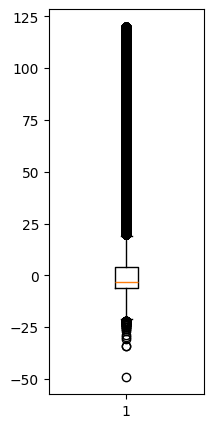

In [97]:
# İstatistiksel bir methodoloji izlemeden önce, kenidimiz bir eşik değer belirleyelim ve aykırı değerlerden böylece kurtulmaya çalışalım.

threshold: 120 # 2 saat
target2 = target[target <= 120]

plt.figure(figsize=(2,5))
plt.boxplot(target2);

print('Aykırı değerleri ayıklamadan önce veri boyutu:', target.size)
print('Aykırı değerleri ayıkladıktan sonra veri boyutu:', target2.size)
print('Veri kaybı:', target.size-target2.size)


Uç değerleri manuel olarak temizledik ve oluşan veri kaybını gözlemledik. Tahmin problemi için istatistiksel bir methodoloji ile (örneğin IQR, eşik değer 1.5 olarak ayarlanabilir) ilerleyebileceğimiz görülmektedir. Fakat sınıflandırma için, veri setini eksiltmek zorunda kalmayacağımız farklı bir yaklaşım benimsenebilir. Kodun devamında bu durum açıklanmaya çalışılacaktır.

DelayLabel
Almost on time    136600
Early              80736
Delay              67406
Name: count, dtype: int64


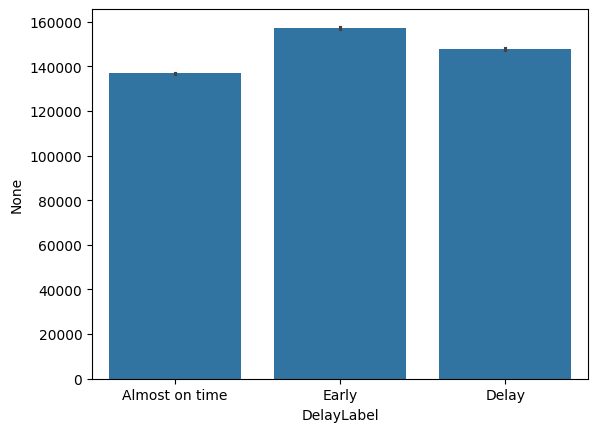

In [98]:

target2_df = target2.to_frame()
target2_df['DelayLabel'] = None

# epoch = 0
for i in range(target2_df.shape[0]):

    value = target2_df.iloc[i, 0]

    if (value < -5): 
        target2_df.iloc[i, 1] = 'Early'

    elif (value > 5):
        target2_df.iloc[i, 1] = 'Delay'

    else:
        target2_df.iloc[i, 1] = 'Almost on time'

print(target2_df.DelayLabel.value_counts(dropna=False))

sns.barplot(x = 'DelayLabel', y = target2_df.DelayLabel.index, data = target2_df);

Peki ya aykırı değerleri temizlemezsek?

DelayLabel
Almost on time    136600
Early              80736
Delay              74196
Name: count, dtype: int64


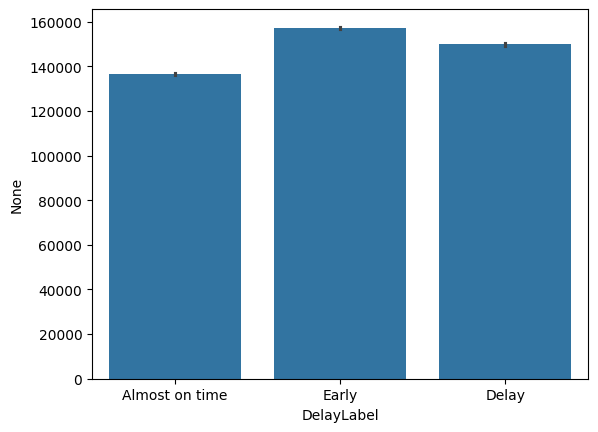

In [99]:
target_df = target.to_frame()
target_df['DelayLabel'] = None

# epoch = 0
for i in range(target_df.shape[0]):

    value = target_df.iloc[i, 0]

    if (value < -5): 
        target_df.iloc[i, 1] = 'Early'

    elif (value > 5):
        target_df.iloc[i, 1] = 'Delay'

    else:
        target_df.iloc[i, 1] = 'Almost on time'

print(target_df.DelayLabel.value_counts(dropna=False))

sns.barplot(x = 'DelayLabel', y = target_df.DelayLabel.index, data = target_df);

Aykırı değerler bu problem için bir sorun teşkil etmeyebilir.

Bir kaç farklı denemeden sonra sınıf dağılımlarının düzensiz olmadığı anlamlı bir etiketleme ile bir sınıflandırma özniteliği üretilmiştir. Üç farklı etiket içerdiğinden çoklu sınıflandırma (multi classification) olarak nitelendirilebilir.

In [100]:
df

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepTimeBlk,TaxiOut,TaxiIn,ArrTime,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,DivAirportLandings,Merged by Marketing_Airline_Network,Merged by Operating_Airline,Merged by CRSArrTime,Merged by Distance,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,DelayLabel,TaxiOutLabel,ElapsedError,ElapsedErrorLabel,AirTimeLabel,OriginAirport,DestAirport
0,1582,1631,1627.0,1600-1659,15.0,5.0,1820.0,0.0,0.0,110.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N545US,DL / 19790 / DL,1821 / 1800-1859,581.0 / 3,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0,On Time,15>x<20,-3.0,Took Shorter than Planned,Medium Flight,ATL,FLL
1,1583,1024,1019.0,1000-1059,17.0,3.0,1212.0,0.0,0.0,123.0,113.0,93.0,1.0,0,DL / DL / 19790 / DL / N345NB,DL / 19790 / DL,1227 / 1200-1259,680.0 / 3,-5.0,0.0,0.0,-1.0,-5.0,0.0,0.0,-1.0,Early,15>x<20,10.0,Hitch (<20 min),Medium Flight,FLL,RDU
2,1584,1117,1113.0,1100-1159,14.0,4.0,1131.0,0.0,0.0,85.0,78.0,60.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,1142 / 1100-1159,341.0 / 2,-4.0,0.0,0.0,-1.0,-4.0,0.0,0.0,-1.0,On Time,10>x<15,7.0,Hitch (<10 min),Medium Flight,ATL,JAN
3,1584,1237,1230.0,1200-1259,11.0,5.0,1435.0,0.0,0.0,81.0,65.0,49.0,1.0,0,DL / DL / 19790 / DL / N978AT,DL / 19790 / DL,1458 / 1400-1459,341.0 / 2,-7.0,0.0,0.0,-1.0,-7.0,0.0,0.0,-1.0,Early,10>x<15,16.0,Hitch (<20 min),Short Flight,JAN,ATL
4,1585,900,857.0,0900-0959,13.0,8.0,1038.0,0.0,0.0,110.0,101.0,80.0,1.0,0,DL / DL / 19790 / DL / N878DN,DL / 19790 / DL,1050 / 1000-1059,481.0 / 2,-3.0,0.0,0.0,-1.0,-3.0,0.0,0.0,-1.0,On Time,10>x<15,9.0,Hitch (<10 min),Medium Flight,RIC,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291527,5997,1621,1212.0,1600-1659,32.0,44.0,1503.0,0.0,0.0,151.0,171.0,95.0,1.0,0,AA / AA_CODESHARE / 19805 / AA / N948LR,YV / 20378 / YV,1852 / 1800-1859,685.0 / 3,1191.0,1191.0,1.0,12.0,1191.0,1191.0,1.0,12.0,Delay,x>20,-20.0,Took Shorter than Planned,Medium Flight,CID,DFW
291528,5997,1621,1625.0,1600-1659,10.0,16.0,1829.0,0.0,0.0,151.0,124.0,98.0,1.0,0,AA / AA_CODESHARE / 19805 / AA / N955LR,YV / 20378 / YV,1852 / 1800-1859,685.0 / 3,4.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,On Time,10>x<15,27.0,Bad Timing (>20 min),Medium Flight,CID,DFW
291529,5997,1621,1742.0,1600-1659,13.0,31.0,2004.0,0.0,0.0,151.0,142.0,98.0,1.0,0,AA / AA_CODESHARE / 19805 / AA / N957LR,YV / 20378 / YV,1852 / 1800-1859,685.0 / 3,81.0,81.0,1.0,5.0,81.0,81.0,1.0,5.0,Delay,10>x<15,9.0,Hitch (<10 min),Medium Flight,CID,DFW
291530,5998,1740,1738.0,1700-1759,24.0,3.0,1912.0,0.0,0.0,95.0,94.0,67.0,1.0,0,AA / AA_CODESHARE / 19805 / AA / N958LR,YV / 20378 / YV,1915 / 1900-1959,539.0 / 3,-2.0,0.0,0.0,-1.0,-2.0,0.0,0.0,-1.0,On Time,x>20,1.0,Hitch (<10 min),Medium Flight,DFW,MOB


In [101]:
df.to_csv(r'G:\Other computers\My Laptop D14\Belgeler\CODING\Python.PROJECTS\MTM-DataMining-FlightDelay\manipulated_data\flightDelay_manipulated2.csv', index=False)